In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.io import fits
from hub_tools import *

In [2]:
df = pd.read_table('sat_sources_data/selection_FWHM.txt')
df = df.sort_values(by='L')
df.index = range(len(df))
print(df)

files = os.listdir('../selected')
files.sort()
files = files[1:8*3+1]
files

      Window scale  index           L         B    FWHM250    FWHM160  \
0  26.03' x 20.86'  34549   24.788619  0.083172  32.561327  30.186918   
1  29.94' x 33.61'  34566   43.164813 -0.028771  29.329848  26.669271   
2  44.98' x 36.05'  34567   43.166813  0.011346  32.561327  30.186918   
3   43.11' x 48.4'  34468  331.512263 -0.103315  30.923131  28.412145   
4  31.24' x 25.03'  34479  333.603657 -0.213103  32.428383  30.043469   
5   43.11' x 48.4'  34500  345.406997 -0.952101  33.445479  31.138562   
6  2.008º x 1.347º  34515  351.159893  0.698084  29.370052  26.713479   
7  53.98' x 43.26'  34516  351.243729  0.668585  38.517527  36.532313   

      FWHM70  
0  28.276492  
1  24.485914  
2  28.276492  
3  26.373472  
4  28.123300  
5  29.290272  
6  24.534057  
7  34.970271  


['im070_sat_1_selected.fits',
 'im070_sat_2_selected.fits',
 'im070_sat_3_selected.fits',
 'im070_sat_4_selected.fits',
 'im070_sat_5_selected.fits',
 'im070_sat_6_selected.fits',
 'im070_sat_7_selected.fits',
 'im070_sat_8_selected.fits',
 'im160_sat_1_selected.fits',
 'im160_sat_2_selected.fits',
 'im160_sat_3_selected.fits',
 'im160_sat_4_selected.fits',
 'im160_sat_5_selected.fits',
 'im160_sat_6_selected.fits',
 'im160_sat_7_selected.fits',
 'im160_sat_8_selected.fits',
 'im250_sat_1_selected.fits',
 'im250_sat_2_selected.fits',
 'im250_sat_3_selected.fits',
 'im250_sat_4_selected.fits',
 'im250_sat_5_selected.fits',
 'im250_sat_6_selected.fits',
 'im250_sat_7_selected.fits',
 'im250_sat_8_selected.fits']

/Users/martimdams/FCUP/Internships/IAstro/giant-hub-filament-systems/hub_tools.py:180: RuntimeWarning: invalid value encountered in log10
  plt.imshow(np.log10(data_sub),origin='lower',extent=(xl,xr,yb,yt))


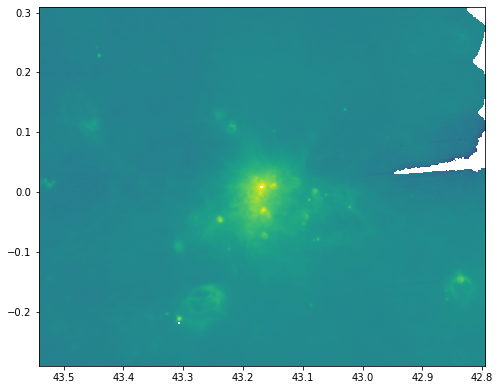

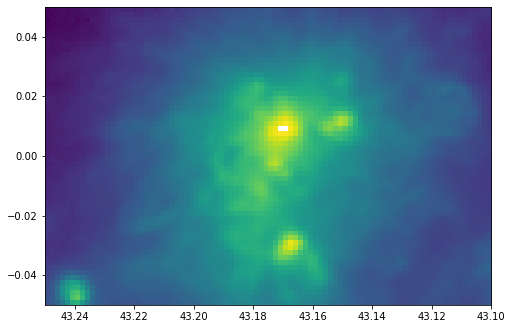

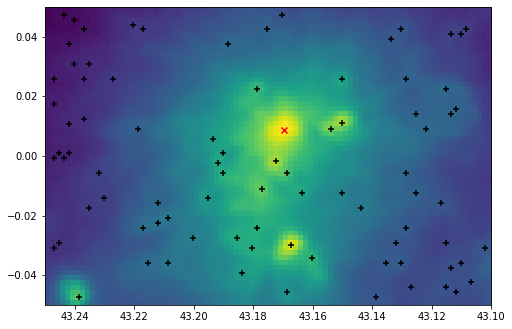

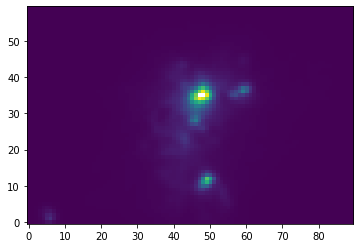

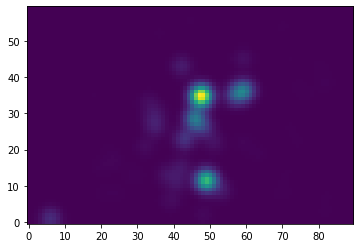

In [3]:
xl,xr = 43.25,43.1
yb,yt = -0.05,0.05

display_fits('../selected/'+files[0])

grid,data_sub,sat_area = display_fits('../selected/'+files[0],lims=[xl,xr,yb,yt],return_vals=True)

n = 1
params,corrected = fitter(grid,data_sub,sat_area,FWHM=np.array(n*[[28.276492,28.276492]])/3600,peaks=n,helper_peaks=True)
plt.figure(figsize=(8,8))
plt.imshow(np.log10(corrected),origin='lower',extent=(xl,xr,yb,yt))
plt.scatter(params[0:n*6:6],params[1:n*6:6],color='r',marker='x',label='Peaks')
plt.scatter(params[n*6::6],params[n*6+1::6],marker='+',color='black',label='Helper peaks')
plt.show()

z = gaussianMult(grid,*params)
plt.imshow(data_sub,origin='lower')
plt.show()
plt.imshow(z,origin='lower')
plt.show()

In [ ]:
FWHMlist = np.concatenate((df['FWHM70'],df['FWHM160'],df['FWHM250']))
for i in range(7+16,8+16):#len(files)):
    file = '../selected/'+files[i]
    FWHMval = FWHMlist[i]
    
    grid,data,sat_area = display_fits(file,return_vals=True)
    
    n = 1
    if sat_area.any():
        xl = float(input('left '))
        xr = float(input('right '))
        yb = float(input('bottom '))
        yt = float(input('top '))
    
        grid_sub,data_sub,sat_area_sub = display_fits(file,lims=[xl,xr,yb,yt],return_vals=True)
        
        if not sat_area.any():
            continue
        try:
            params,corrected = fit(grid_sub,data_sub,sat_area_sub,FWHM=np.array(n*[2*[FWHMval]])/3600,peaks=n,helper_peaks=False)
            plt.figure(figsize=(8,8))
            plt.imshow(np.log10(corrected),origin='lower',extent=(xl,xr,yb,yt))
            plt.scatter(params[:n*6:6],params[1:n*6:6],marker='x',color='r',label='Peaks')
            plt.scatter(params[n*6::6],params[n*6+1::6],marker='+',color='black',label='Helper peaks')
            plt.show()
            
            center = (grid_sub[0][sat_area_sub].mean(),grid_sub[1][sat_area_sub].mean())
            radii = np.ravel(np.sqrt((grid_sub[0]-center[0])**2 + (grid_sub[1]-center[1])**2))
            
            sigmax = params[4]/(2*np.sqrt(2*np.log(2)))
            alphax = 1/(2*sigmax**2)
            gauss = params[2]*np.exp(-alphax*radii**2)
            
            sort = np.argsort(radii)
            plt.figure(figsize=(8,5))
            plt.plot(radii[sort],np.ravel(data_sub)[sort],'x')
            plt.plot(radii[sort],gauss[sort],'k-')
            plt.show()
        except:
            continue
    else:
        continue

In [4]:
df = pd.read_table('sat_sources_data/NGC6334_ATLASGAL_FWHM.txt')
df

,RAJ2000,DEJ2000,amaj250,amin250,PA,FWHM,amaj160,amin160,amaj70,amin70,l,b
0,259.9846,-35.9724,39,19,69,27,38.610232,18.186533,37.587764,15.900943,351.151893,0.695563
1,259.9877,-35.9644,34,26,60,30,33.552198,25.411612,32.370357,23.829394,351.159890,0.698083
2,259.9744,-35.9638,34,31,112,33,33.552198,30.508196,32.370357,29.203424,351.154221,0.707254
3,260.0852,-35.9208,24,20,61,22,23.361293,19.228885,21.629609,17.083325,351.240803,0.658259
4,260.0862,-35.9150,25,19,130,22,24.387497,18.186533,22.734115,15.900943,351.246026,0.660908
5,260.0768,-35.9125,51,30,26,39,50.702564,29.491524,49.928349,28.139652,351.243727,0.668585
6,260.0566,-35.9128,24,19,74,21,23.361293,18.186533,21.629609,15.900943,351.234129,0.681837
7,260.0904,-35.9277,29,22,-1,25,28.473672,21.301408,27.071018,19.386593,351.237546,0.650860
8,260.0852,-35.9208,24,20,61,22,23.361293,19.228885,21.629609,17.083325,351.240803,0.658259
9,260.0980,-35.9157,37,26,87,31,36.588933,25.411612,35.508309,23.829394,351.250912,0.652665


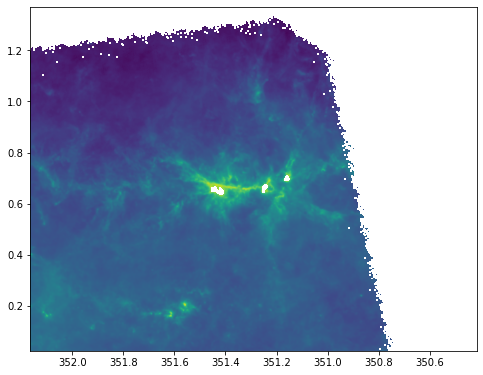

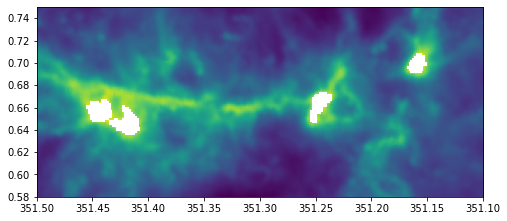

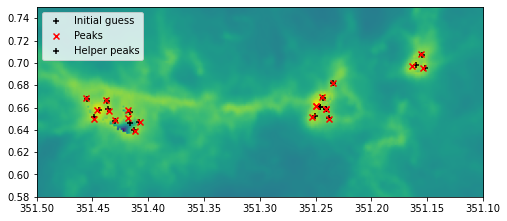

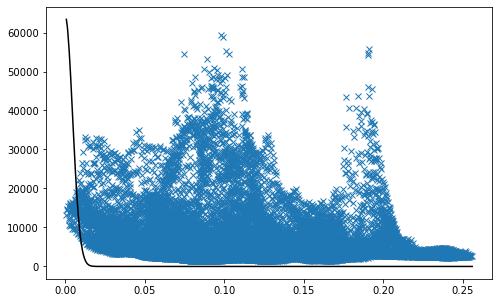

In [6]:
file = '../selected/'+files[23]

xyvals = np.array(df[['l','b']])
thetavals = np.array(df['PA'])/180*np.pi
FWHMvals = np.array(df[['amaj250','amin250']])/3600
    
grid,data,sat_area = display_fits(file,return_vals=True)
    
n = len(xyvals)
xl = 351.5
xr = 351.1
yb = 0.58
yt = 0.75
    
grid_sub,data_sub,sat_area_sub = display_fits(file,lims=[xl,xr,yb,yt],return_vals=True)
        
params,corrected = fitter(grid_sub,data_sub,sat_area_sub,mu=xyvals,theta=thetavals,FWHM=FWHMvals,peaks=n,helper_peaks=False)
plt.figure(figsize=(8,8))
plt.imshow(np.log10(corrected),origin='lower',extent=(xl,xr,yb,yt))
plt.scatter(xyvals[:,0],xyvals[:,1],marker='+',color='black',label='Initial guess')
plt.scatter(params[:n*6:6],params[1:n*6:6],marker='x',color='r',label='Peaks')
plt.scatter(params[n*6::6],params[n*6+1::6],marker='+',color='black',label='Helper peaks')
plt.legend()
plt.show()
            
center = (grid_sub[0][sat_area_sub].mean(),grid_sub[1][sat_area_sub].mean())
radii = np.ravel(np.sqrt((grid_sub[0]-center[0])**2 + (grid_sub[1]-center[1])**2))
            
sigmax = params[4]/(2*np.sqrt(2*np.log(2)))
alphax = 1/(2*sigmax**2)
gauss = params[2]*np.exp(-alphax*radii**2)

sort = np.argsort(radii)
plt.figure(figsize=(8,5))
plt.plot(radii[sort],np.ravel(data_sub)[sort],'x')
plt.plot(radii[sort],gauss[sort],'k-')
plt.show()

In [6]:
hdu = fits.open(file)[0]
h = hdu.header
h

SIMPLE  =                    T / Written by IDL:  Fri Jun 22 02:52:52 2012      
BITPIX  =                  -32 /Real*4 (floating point)                         
NAXIS   =                    2 /                                                
NAXIS1  =                 1050                                                  
NAXIS2  =                  809                                                  
EXTEND  =                    T /                                                
CTYPE1  = 'GLON-TAN'           / galactic longitude, gnomonic projection        
CTYPE2  = 'GLAT-TAN'           / galactic latitude, gnomonic projection         
CRPIX1  =                 40.0 / Pixel coordinate of reference point            
CRPIX2  =               -102.0 / Pixel coordinate of reference point            
CRVAL1  =       352.098074760  / [deg] Coordinate value at reference point      
CRVAL2  =     -0.146596069788  / [deg] Coordinate value at reference point      
CDELT1  =   -0.0016666666666

In [8]:
for i in ['1','2']:
    print( h['crval'+i],' ---> ',h['crval'+i] + h['cdelt'+i]*h['naxis'+i] )

352.09807476  --->  350.34807475999645
-0.146596069788  --->  1.2017372635480301
